In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()
data = pd.DataFrame(dataset.data, dataset.target)
X, y = load_iris(return_X_y=True, as_frame=True)
features_name = dataset.target_names
print('\nloading Dataset... \n')


loading Dataset... 



D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


loading plotting dataset... 



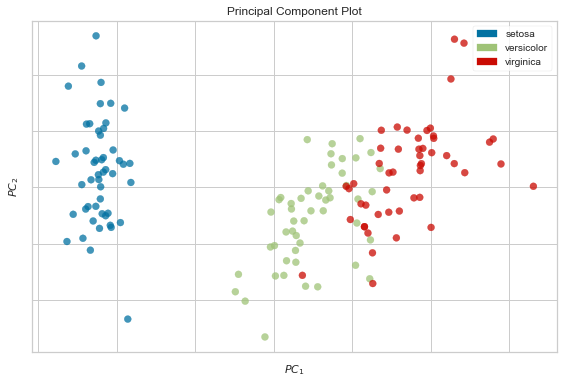

D:\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


PCA(ax=<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>,
    classes=array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [3]:
# Plotting dataset
from yellowbrick.features import pca_decomposition
print('loading plotting dataset... \n')
pca_decomposition(X,y, scale=True, projection=2, classes=features_name)

In [4]:
# Preprocessing data
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler().fit_transform(X)
print('loading Standardization... \n')

loading Standardization... 



In [5]:
# Data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
print('loading data splitting... \n')

loading data splitting... 



In [6]:
# Learning algorithm
from sklearn.svm import SVC
model = SVC().fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Training Accuracy : ', model.score(X_train,y_train))
print('Testing Accuracy : ', model.score(X_test,y_test))

Training Accuracy :  0.9583333333333334
Testing Accuracy :  0.9333333333333333


In [7]:
# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
gsc = GridSearchCV(SVC(), {
    'kernel': ['linear','poly','rbf','sigmoid'], 
    'gamma': ['scale','auto'], 
    'C': [0.1,1,10,100]}, 
    cv=5, return_train_score=True)
gsc.fit(X_train,y_train)
tuning = pd.DataFrame(gsc.cv_results_)


model = SVC(C=10, gamma='auto', kernel='rbf').fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Training Accuracy : ', model.score(X_train,y_train))
print('Testing Accuracy : ', model.score(X_test,y_test))

Training Accuracy :  0.9833333333333333
Testing Accuracy :  0.9666666666666667


In [8]:
# CV model
from sklearn.model_selection import cross_val_score, ShuffleSplit
cvs = cross_val_score(SVC(), X, y, cv=5)
print('\nCV-model... \n')
cvs.mean()


CV-model... 



0.9666666666666666

Balanced accuracy score :  0.9743589743589745
MCC :  0.9508693106633108
Classification report : 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


loading plots...



D:\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


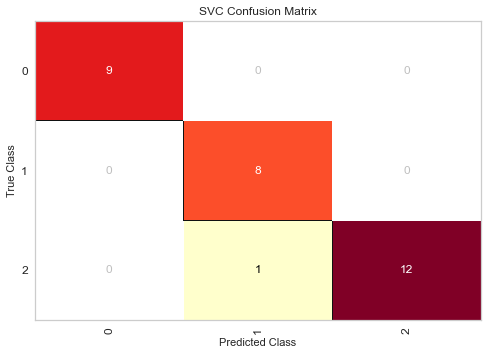

D:\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


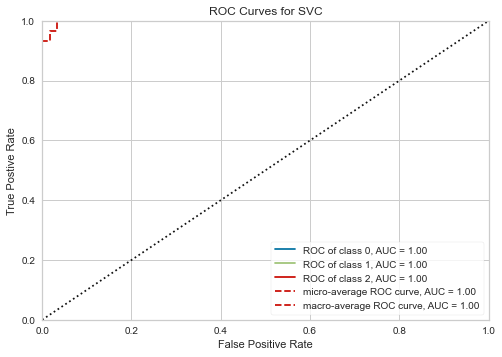

D:\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


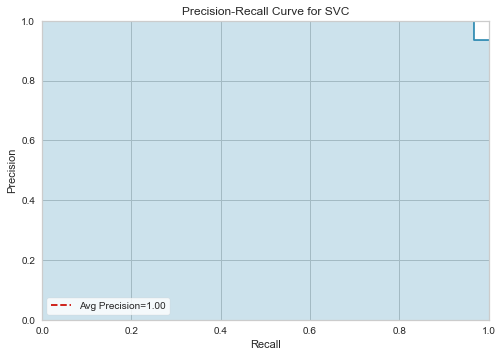

D:\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


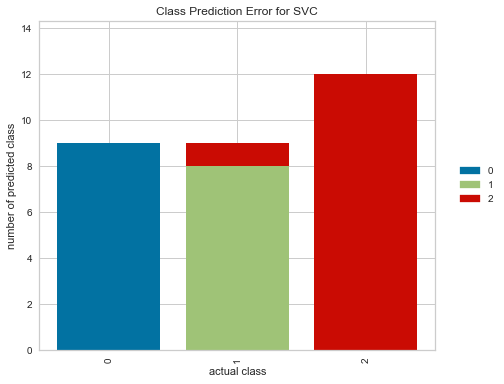

D:\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ClassPredictionError(ax=<AxesSubplot:title={'center':'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>,
                     model=None)

In [9]:
# Evaluate Model Performance
from sklearn.metrics import (balanced_accuracy_score, matthews_corrcoef, 
                             roc_auc_score, classification_report)
print('Balanced accuracy score : ' ,balanced_accuracy_score(y_test, y_pred))
print('MCC : ', matthews_corrcoef(y_test, y_pred))
#print('roc/auc score : ', roc_auc_score(y_test, y_pred, multi_class='ovr'))
print('Classification report : \n', classification_report(y_test, y_pred, 
                                                          target_names=features_name))


from yellowbrick.classifier import (confusion_matrix, ROCAUC, 
                                    precision_recall_curve)
print('\nloading plots...\n')
confusion_matrix(model, X_train, y_train, X_test, y_test)

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

precision_recall_curve(model, X_train, y_train, X_test, y_test)


from yellowbrick.classifier import class_prediction_error
class_prediction_error(model, X_train, y_train, X_test, y_test)